# Steps
- Read and Understand the data
- EDA
  - Univariate analysis
  - Bivariate analysis


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
data = pd.merge(transactions, customers, how='left', on='CustomerID')

In [ ]:
data = pd.merge(data, products, how='left', on='ProductID')

In [ ]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
data.shape

(1000, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


### there is no null values in the data

## EDA

In [ ]:
#analysing customers
data.CustomerID.nunique()

199

In [ ]:
#analysing products
data.ProductID.nunique()

100

In [ ]:
data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [ ]:
eda_data = data.drop(['TransactionID','CustomerName','ProductName','Price_x'], axis=1)

In [ ]:
eda_data.shape

(1000, 10)

In [ ]:
eda_data.head()

,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,Category,Price_y
0,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe,2022-12-03,Electronics,300.68
1,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia,2024-09-04,Electronics,300.68
2,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe,2024-04-04,Electronics,300.68
3,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America,2024-04-11,Electronics,300.68
4,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe,2022-03-15,Electronics,300.68


In [ ]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   ProductID        1000 non-null   object        
 2   TransactionDate  1000 non-null   datetime64[ns]
 3   Quantity         1000 non-null   int64         
 4   TotalValue       1000 non-null   float64       
 5   Price_x          1000 non-null   float64       
 6   Region           1000 non-null   object        
 7   SignupDate       1000 non-null   datetime64[ns]
 8   Category         1000 non-null   object        
 9   Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
#converting datetime columns
eda_data['TransactionDate'] = pd.to_datetime(eda_data['TransactionDate'])
eda_data['SignupDate'] = pd.to_datetime(eda_data['SignupDate'])

In [ ]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   ProductID        1000 non-null   object        
 2   TransactionDate  1000 non-null   datetime64[ns]
 3   Quantity         1000 non-null   int64         
 4   TotalValue       1000 non-null   float64       
 5   Price_x          1000 non-null   float64       
 6   Region           1000 non-null   object        
 7   SignupDate       1000 non-null   datetime64[ns]
 8   Category         1000 non-null   object        
 9   Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
eda_data['SignupDate'].min()

Timestamp('2022-01-22 00:00:00')

In [ ]:
eda_data['SignupDate'].max()

Timestamp('2024-12-28 00:00:00')

In [ ]:
eda_data['Transaction_Year'] = eda_data['TransactionDate'].dt.year
eda_data['Transaction_Month'] = eda_data['TransactionDate'].dt.month
eda_data['Transaction_Day'] = eda_data['TransactionDate'].dt.day
eda_data['Transaction_Hour'] = eda_data['TransactionDate'].dt.hour
eda_data['Signup_Year'] = eda_data['SignupDate'].dt.year
eda_data['Signup_Month'] = eda_data['SignupDate'].dt.month
eda_data['Signup_Day'] = eda_data['SignupDate'].dt.day

In [ ]:
eda_data.drop(['TransactionDate','SignupDate'], axis=1, inplace=True)

In [ ]:
eda_data.head()

,CustomerID,ProductID,Quantity,TotalValue,Price_x,Region,Category,Price_y,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_Hour,Signup_Year,Signup_Month,Signup_Day
0,C0199,P067,1,300.68,300.68,Europe,Electronics,300.68,2024,8,25,12,2022,12,3
1,C0146,P067,1,300.68,300.68,Asia,Electronics,300.68,2024,5,27,22,2024,9,4
2,C0127,P067,1,300.68,300.68,Europe,Electronics,300.68,2024,4,25,7,2024,4,4
3,C0087,P067,2,601.36,300.68,South America,Electronics,300.68,2024,3,26,22,2024,4,11
4,C0070,P067,3,902.04,300.68,Europe,Electronics,300.68,2024,3,21,15,2022,3,15


In [ ]:
def month_day(x):
    if 1 <=x <= 10:
        return 'Start'
    elif 11 <= x <= 20:
        return 'Mid'
    else:
        return 'End'

In [ ]:
eda_data['Signup_Day'] = eda_data['Signup_Day'].apply(month_day)
eda_data['Transaction_Day'] = eda_data['Transaction_Day'].apply(month_day)

In [ ]:
def hour(x):
    if 8 <= x <= 12:
        return 'Morning'
    elif 12 <= x <= 16:
        return 'Afternoon'
    elif 16 <= x <= 20:
        return 'Evening'
    elif 20 <= x <= 24:
        return 'Night'
    elif 24 <= x <= 4:
        return 'Late Night'
    else:
        return 'Early Morning'


In [ ]:
eda_data['Transaction_Hour'] = eda_data['Transaction_Hour'].apply(hour)

In [ ]:
# seprating categorical and numerical data
cat_col = []
num_col= []
for x in eda_data.columns:
    if eda_data[x].dtype == 'object' or eda_data[x].nunique() < 15:
        cat_col.append(x)
    else:
        num_col.append(x)

In [ ]:
cat_col

['CustomerID',
 'ProductID',
 'Quantity',
 'Region',
 'Category',
 'Transaction_Year',
 'Transaction_Month',
 'Transaction_Day',
 'Transaction_Hour',
 'Signup_Year',
 'Signup_Month',
 'Signup_Day']

In [ ]:
num_col

['TotalValue', 'Price_x', 'Price_y']

#### Univariate analysis

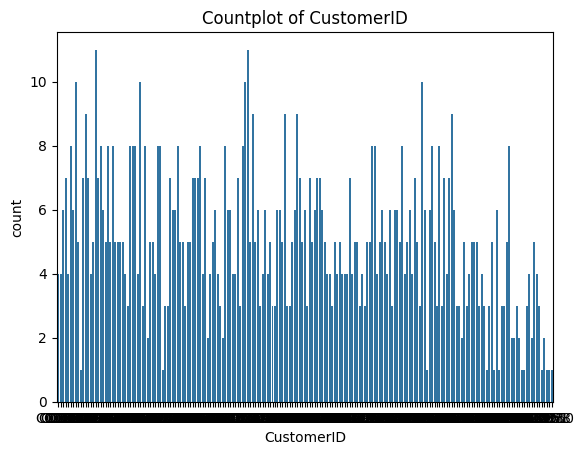

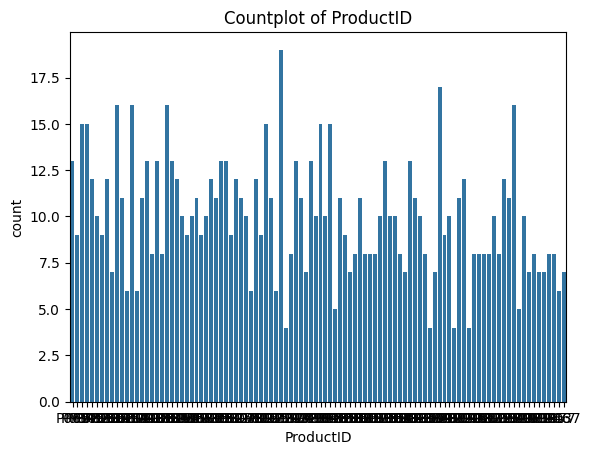

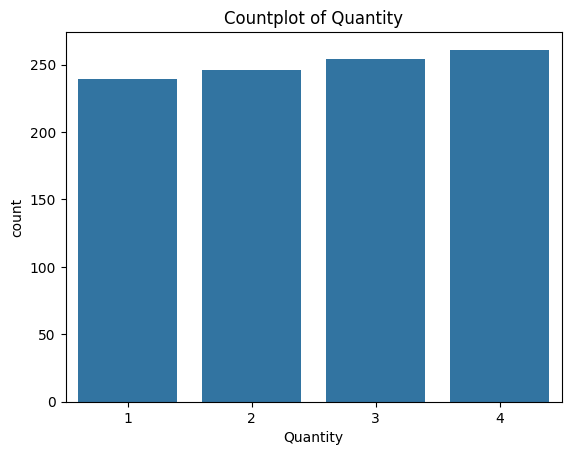

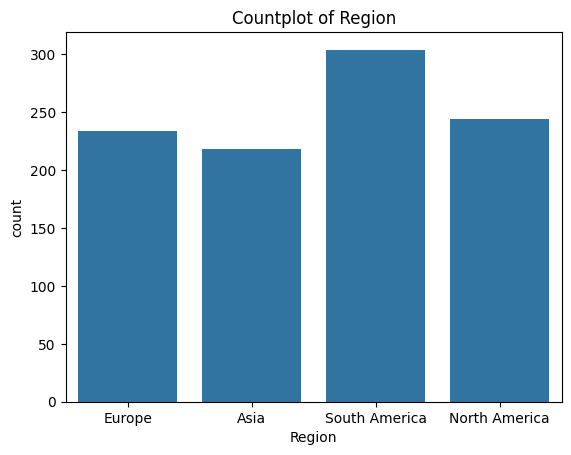

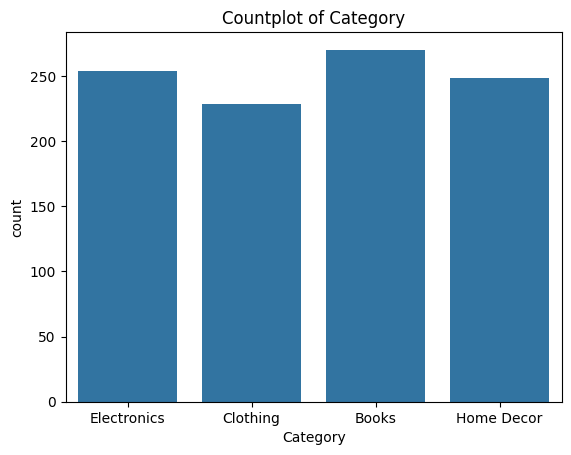

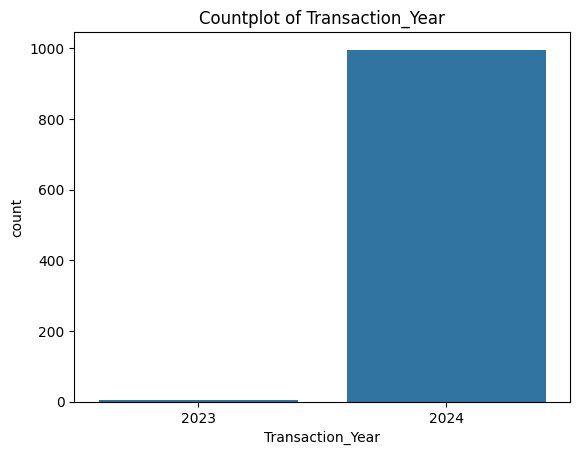

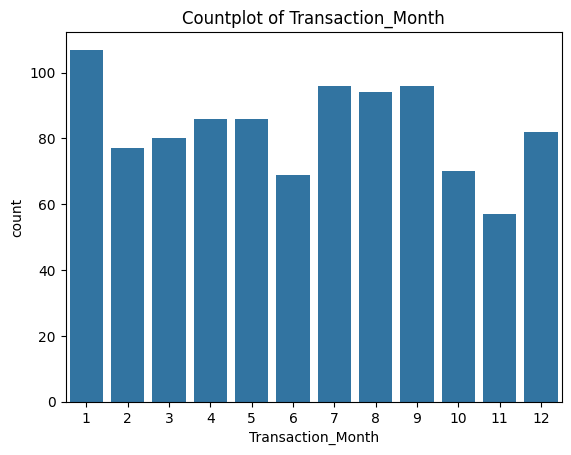

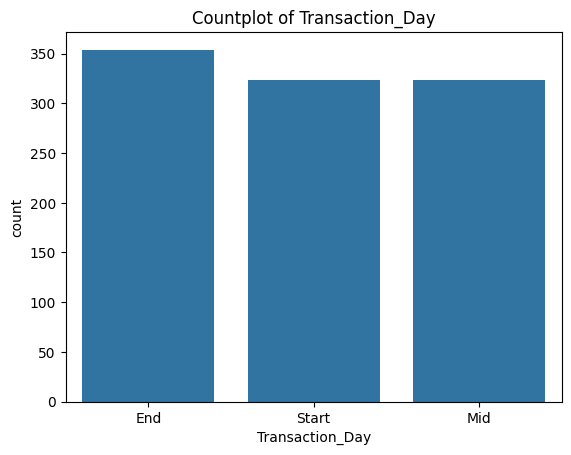

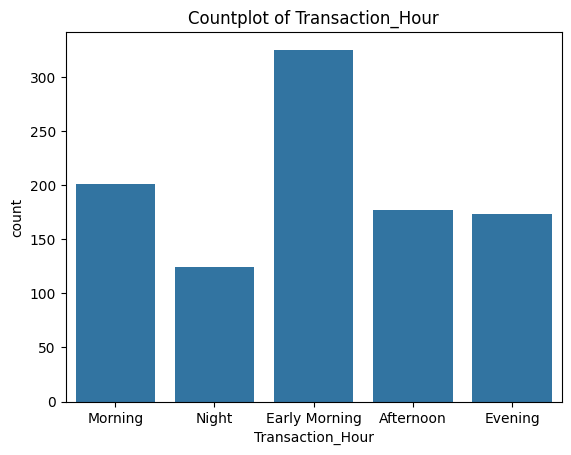

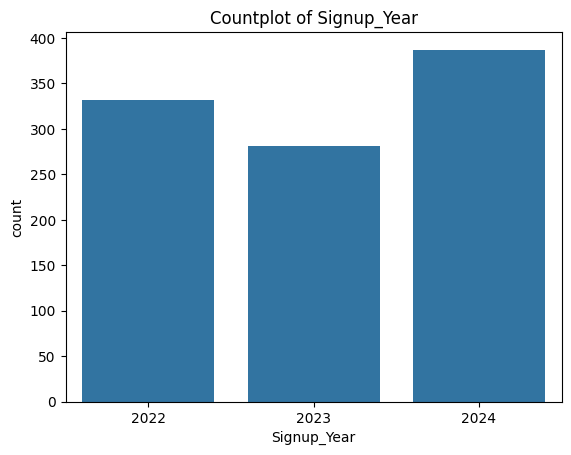

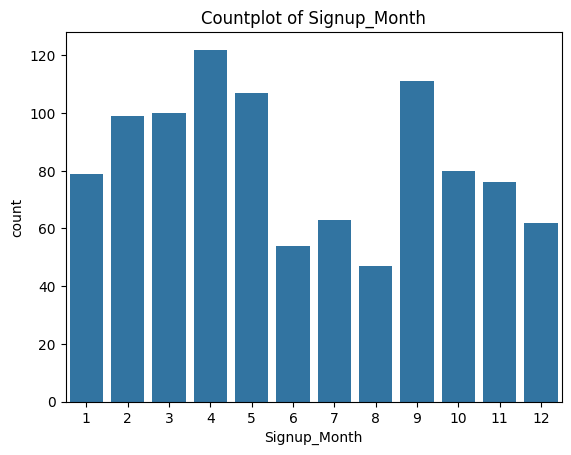

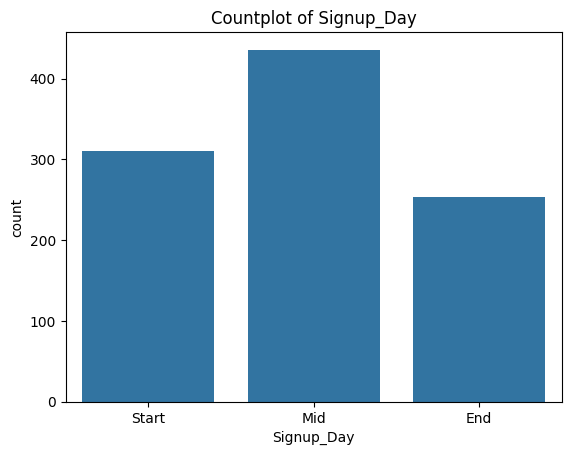

In [ ]:
for col in cat_col:
  sns.countplot(x= eda_data[col])
  plt.title("Countplot of " + col)
  plt.show()

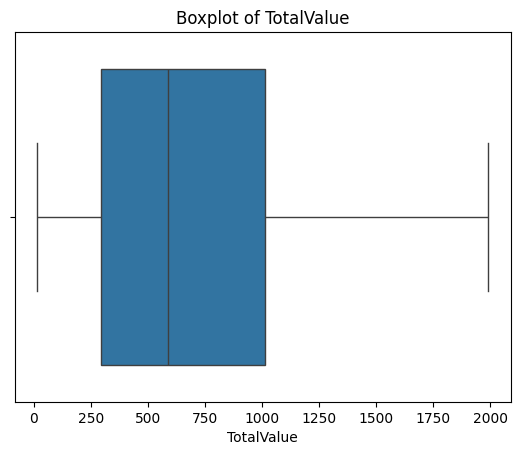

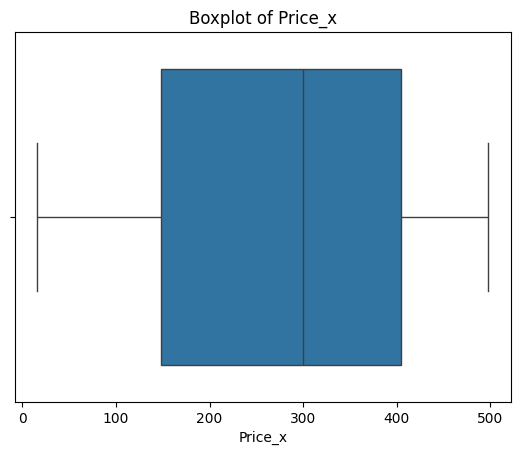

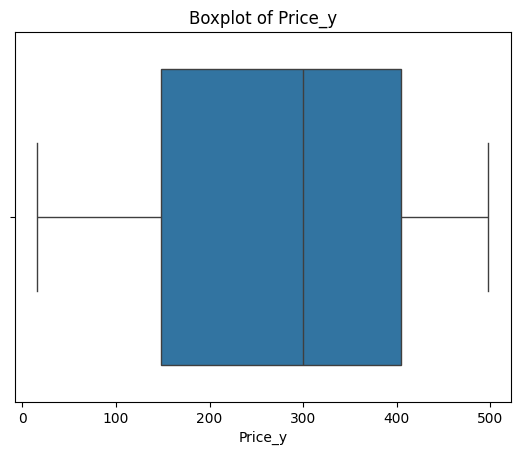

In [ ]:
for col in num_col:
  sns.boxplot(x= eda_data[col])
  plt.title("Boxplot of " + col)
  plt.show()

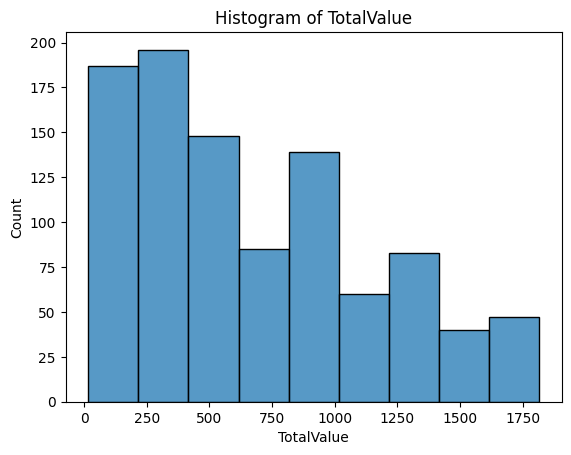

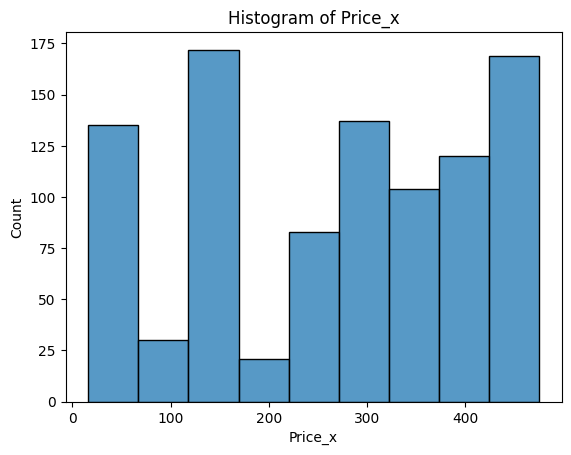

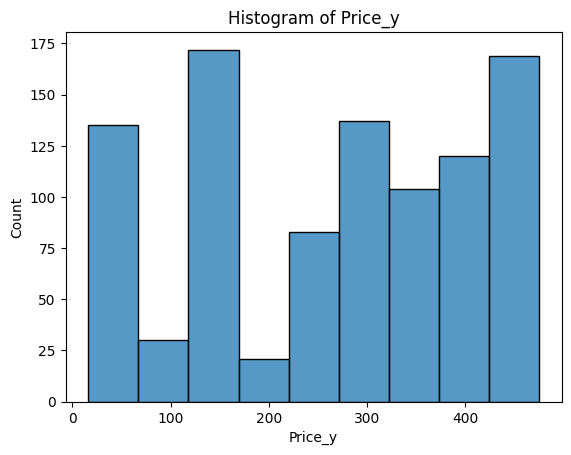

In [ ]:
for col in num_col:
  max_value = eda_data[col].max()
  min_value = eda_data[col].min()
  value = (max_value+min_value)// 10
  bins = np.arange(min_value, max_value+1, value)
  sns.histplot(x= eda_data[col], bins = bins)
  plt.title("Histogram of " + col)
  plt.show()

#### Bivariate analysis

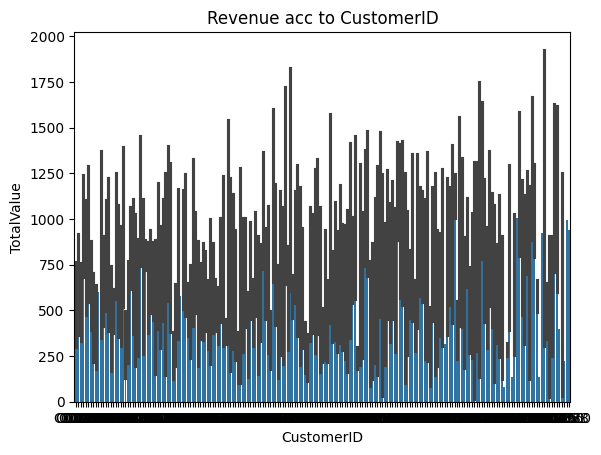

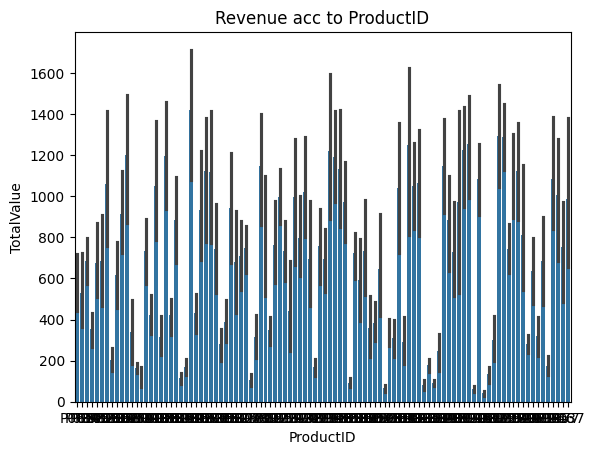

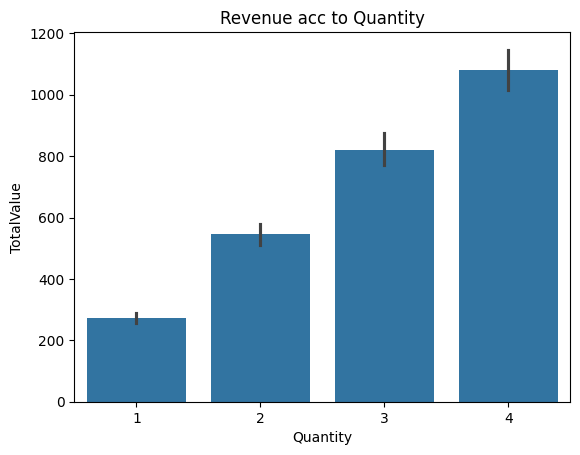

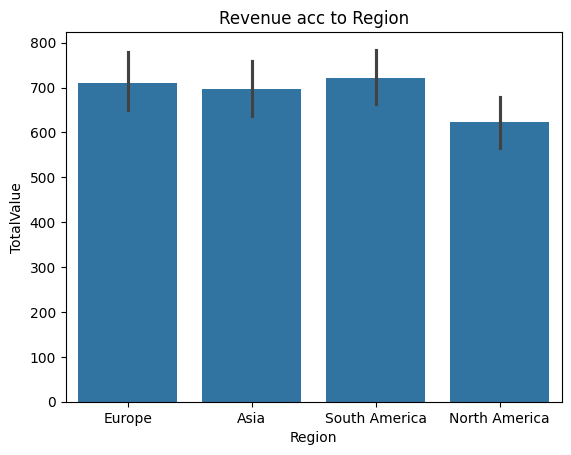

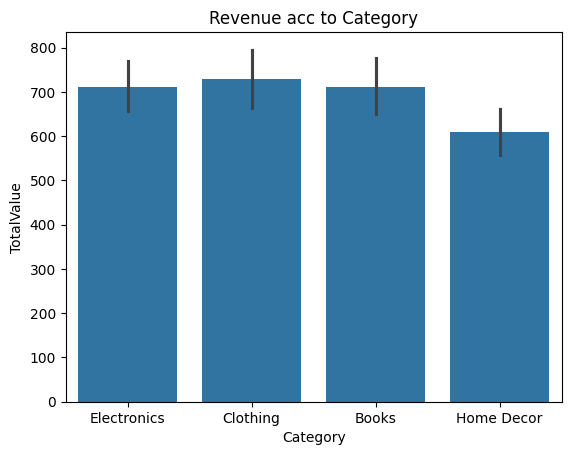

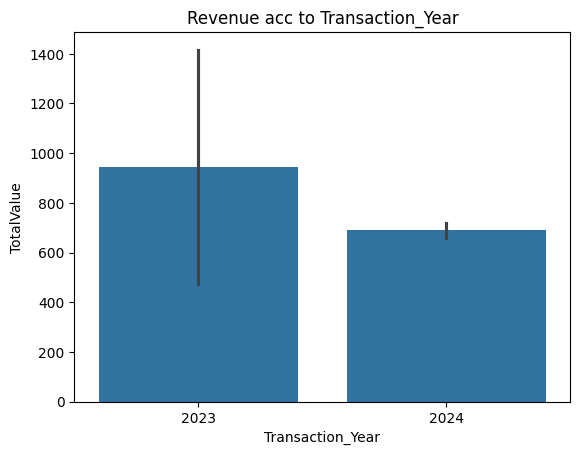

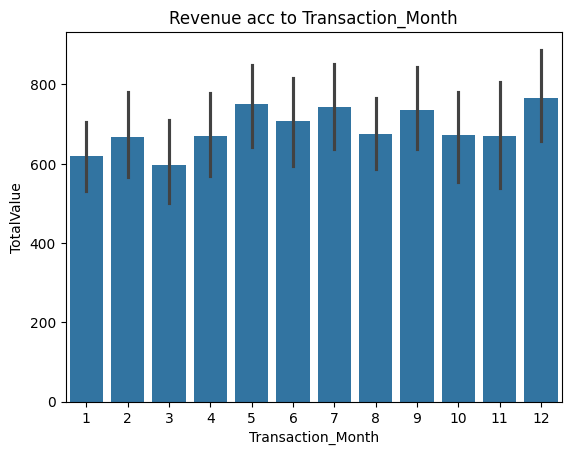

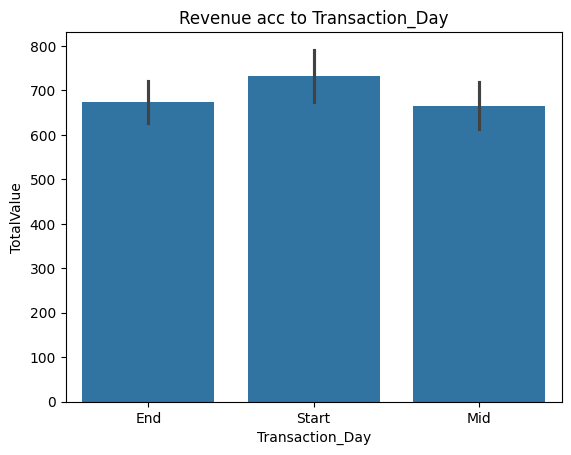

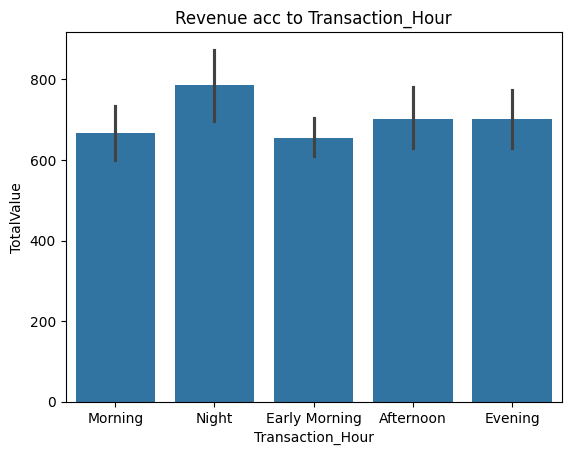

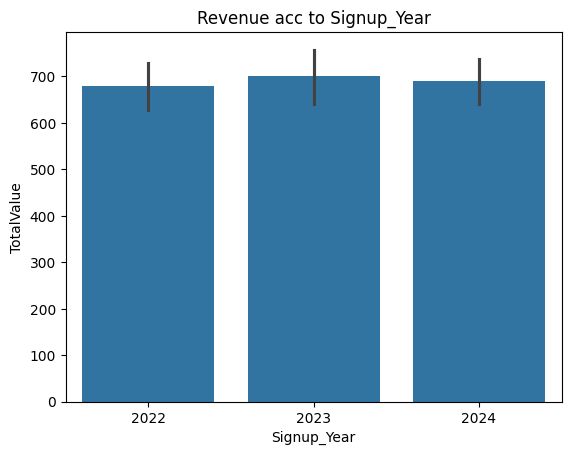

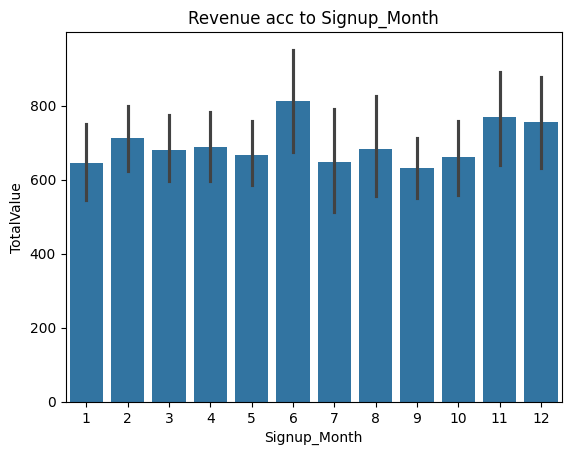

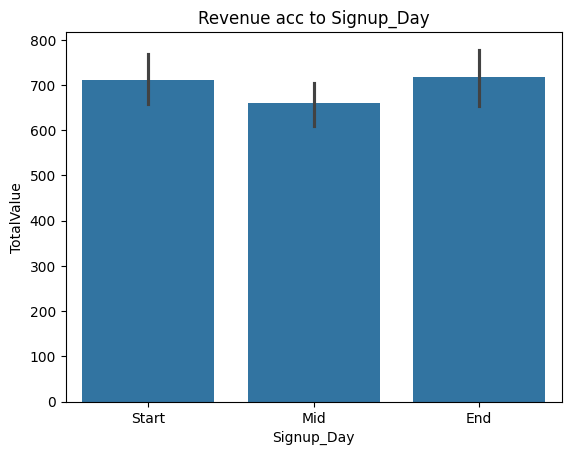

In [ ]:
for col in cat_col:
  sns.barplot(x= eda_data[col], y= eda_data['TotalValue'])
  plt.title("Revenue acc to " + col)
  plt.show()

In [ ]:
eda_data['Transaction_Year'].value_counts()

,count
Transaction_Year,
2024,996
2023,4


#### there are ony 4 transaction in year 2023, that's why the revenue has a significant dip.

In [ ]:
cat_pro = eda_data.groupby(eda_data['ProductID'])['TotalValue'].mean().sort_values(ascending = False).reset_index()

In [ ]:
cat_pro = pd.merge(cat_pro, products[['ProductID','ProductName']], how='left', on='ProductID')

In [ ]:
cat_pro['Revenue'] = cat_pro['TotalValue'] / cat_pro['TotalValue'].sum() * 100

In [ ]:
cat_pro.head(10)

,ProductID,TotalValue,ProductName,Revenue
0,P086,1420.033333,SoundWave Novel,2.090183
1,P075,1294.176000,TechPro Textbook,1.904930
2,P005,1287.930000,TechPro T-Shirt,1.895736
3,P020,1255.076667,ActiveWear Jacket,1.847379
4,P018,1248.257143,ComfortLiving Mystery Book,1.837341
5,P019,1226.177273,ComfortLiving Sweater,1.804841
6,P017,1221.402000,ActiveWear Textbook,1.797812
7,P041,1202.920000,ComfortLiving Smartphone,1.770608
8,P085,1197.006250,BookWorld Biography,1.761903
9,P048,1193.680000,TechPro Cookbook,1.757007


In [ ]:
cat_pro.tail(10)

,ProductID,TotalValue,ProductName,Revenue
90,P082,132.976250,ComfortLiving Rug,0.195731
91,P070,121.725000,HomeSense T-Shirt,0.179170
92,P003,113.976667,ComfortLiving Biography,0.167765
93,P078,107.068000,HomeSense Rug,0.157596
94,P063,93.305556,TechPro Novel,0.137339
95,P014,91.910000,ActiveWear Jacket,0.135285
96,P035,79.534000,ActiveWear T-Shirt,0.117068
97,P073,64.776000,ComfortLiving Laptop,0.095345
98,P044,61.165000,ActiveWear Running Shoes,0.090030
99,P056,42.210000,SoundWave Smartwatch,0.062130


In [ ]:
cust = eda_data.groupby(eda_data['CustomerID'])['TotalValue'].mean().sort_values(ascending = False).reset_index()

In [ ]:
cust = pd.merge(cust, customers[['CustomerID','CustomerName']], how='left', on='CustomerID')

In [ ]:
cust['Revenue'] = cust['TotalValue'] / cat_pro['TotalValue'].sum() * 100

In [ ]:
cust.head(10)

,CustomerID,TotalValue,CustomerName,Revenue
0,C0040,1323.133333,Michael Harrell,1.947553
1,C0089,1278.110000,Paul Carter,1.881282
2,C0066,1266.426667,Catherine White,1.864085
3,C0168,1263.457500,Karen Clements MD,1.859715
4,C0196,1245.720000,Laura Watts,1.833606
5,C0096,1214.584000,Benjamin Mcclure,1.787777
6,C0114,1156.086000,Benjamin Anderson,1.701672
7,C0185,1141.440000,Kathleen Logan,1.680114
8,C0138,1122.050000,Cynthia Clayton,1.651573
9,C0148,1091.558000,Matthew Rogers,1.606691


In [ ]:
cust.tail(10)

,CustomerID,TotalValue,CustomerName,Revenue
189,C0049,289.435000,Jason Yates,0.426027
190,C0077,279.100000,Scott Sims,0.410814
191,C0121,243.630000,Mark Atkinson,0.358605
192,C0119,238.322000,David Armstrong,0.350792
193,C0032,224.333333,Dustin Campbell,0.330202
194,C0151,223.960000,Amber Gonzalez,0.329652
195,C0083,214.266667,Christina Stark,0.315384
196,C0097,137.540000,Tina Ford,0.202449
197,C0033,132.640000,Tyler Holt,0.195236
198,C0060,82.360000,James Murphy,0.121228
